# Week 3: Calculus (cont'd)

In [1]:
# Load libraries
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy.optimize as opt

## Day 3: Numerical Optimization (Multivariable Functions)
* Here we continue with the process of fining minimum and maximum points for multivariable functions
* Like earlier, we will be using **numerical optimization** methods to find an approximate minima

### Gradient Descent Method
* We will modify the Gradient Descent Method to work for multivariable functions
* Let $f(x, y)$ be a function of two variables $x$ and $y$, and let $f_x(x, y)$ and $f_y(x, y)$ be its partial derivatives.
* Starting with some initial approximation $(x_0, y_0)$, we generate a sequence of points $(x_1, y_1), (x_2, y_2), \ldots$ which approaches a local minimum $(x^*, y^*)$
* To obtain the next point in the sequence $(x_{k+1}, y_{k+1})$ from the current point $(x_k, y_k)$ we use the following recursive relations:
\begin{equation}\left\{
\begin{array}{rcl}
    x_{k+1} &=& x_k - \alpha\cdot f_x(x_k, y_k)\\
    y_{k+1} &=& y_k - \alpha\cdot f_y(x_k, y_k)
\end{array}\right.
\end{equation}
where $\alpha$ is the learning rate of the algorithm.
* Alternatively, if we label the points $\mathbf{x}_k = (x_k, y_k)$, and the gradient $\nabla f(\mathbf{x}_k)$, then the recursive relation can be expresed as:
\begin{equation}
    \mathbf{x}_{k+1} = \mathbf{x}_k - \alpha \cdot \nabla f(\mathbf{x}_k)
\end{equation}
* The algorithm stops either when the number of iterations $k$ has reached the preset maximum $max\_iter$, or when the Euclidean norm of the gradient at $\mathbf{x}_k$ given by $\|\nabla f(\mathbf{x}_k)\|_2$ becomes less than the preset tolerance $tol$.

### Example 1
* Find the minimum of the function $f(x, y) = x^2 + y^2 + 1$ using the Gradient Descent Method. Use $(x_0, y_0) = (-5, 7)$ and $\alpha = 0.1$, with maximum number of allowed iterations $max\_iter = 500$ and tolerance $tol = 10^{-6}$
* This function has only one minimum point $(x^*, y^*) = (0. 0)$ with a minimum value $f(x^*, y^*) = 1$

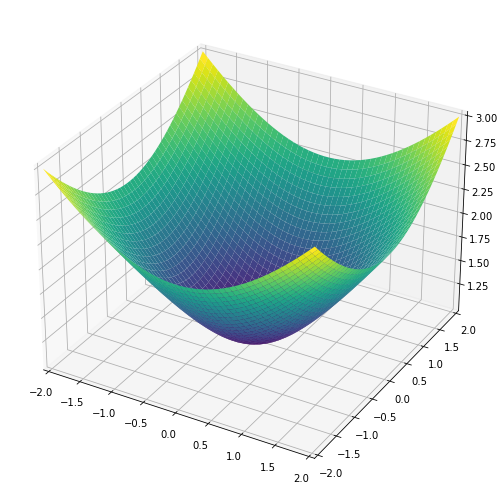

In [2]:
# Define the variables and the function
x, y = sp.symbols('x y')
f = sp.Function('f', real=True)

f = sp.sqrt(x**2 + y**2 + 1)


# Plot the function, just for fun
sp.plotting.plot3d(f, (x, -2, 2), (y, -2, 2), size=(7, 7))

In [3]:
# Calculating the partial derivatives of f
f_x = f.diff(x)
f_y = f.diff(y)
print(f_x)
print(f_y)

x/sqrt(x**2 + y**2 + 1)
y/sqrt(x**2 + y**2 + 1)


In [4]:
# Define numpy functions for the function and its gradient
def func(x):
    return np.sqrt(x[0]**2 + x[1]**2 + 1)

def grad(x):
    return np.array([x[0]/np.sqrt(x[0]**2 + x[1]**2 + 1), x[1]/np.sqrt(x[0]**2 + x[1]**2 + 1)])

In [5]:
xk = np.array([-5, 7])
alpha = 0.1
max_iter = 500
tol = 1e-6
k = 0

while k < max_iter and np.linalg.norm(grad(xk), 2) > tol:
    xk = xk - alpha*grad(xk)
    k = k + 1

print('xk = ', xk)
print('f(xk) = ', func(xk))
print('k = ', k)
print('|grad| = ', np.linalg.norm(grad(xk), 2))

xk =  [-5.52462382e-07  7.73447334e-07]
f(xk) =  1.0000000000004516
k =  214
|grad| =  9.504922209582972e-07


### Example 2
* Find the minimum of the function $g(x, y) = \frac{x - y}{x^2 + y^2}$ using the Gradient Descent Method. Use $(x_0, y_0) = (0.5, -0.5)$ and $\alpha = 2$, with maximum number of allowed iterations $max\_iter = 500$ and tolerance $tol = 10^{-6}$

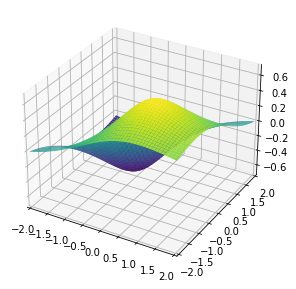

xk =  [-0.7071077  0.7071077]
g(xk) =  -0.7071067811859486
k =  19
|grad| =  9.202362858481398e-07


In [6]:
x, y = sp.symbols('x[0] x[1]')
g = sp.Function('g', real=True)
g = (x - y)/(x**2 + y**2 + 1)

sp.plotting.plot3d(g, (x, -2, 2), (y, -2, 2))

#print(g)
#print(g.diff(x))
#print(g.diff(y))

def g(x):
    return (x[0] - x[1])/(x[0]**2 + x[1]**2 + 1)

def grad_g(x):
    return np.array([-2*x[0]*(x[0] - x[1])/(x[0]**2 + x[1]**2 + 1)**2 + 1/(x[0]**2 + x[1]**2 + 1),
                     -2*x[1]*(x[0] - x[1])/(x[0]**2 + x[1]**2 + 1)**2 - 1/(x[0]**2 + x[1]**2 + 1)])


xk = np.array([0.5, -0.5])
alpha = 2
max_iter = 500
tol = 1e-6
k = 0

while k < max_iter and np.linalg.norm(grad_g(xk), 2) > tol:
    xk = xk - alpha*grad_g(xk)
    k = k + 1

print('xk = ', xk)
print('g(xk) = ', g(xk))
print('k = ', k)
print('|grad| = ', np.linalg.norm(grad_g(xk), 2))

### Example 2a
* Under the same conditions, find the maximum point of the function $g(x, y)$ from **Example 2**

In [7]:
# Define the function -g(x, y)
def minus_g(x):
    return -g(x)

def grad_minus_g(x):
    return -grad_g(x)


xk = np.array([0.5, -0.5])
alpha = 2
max_iter = 500
tol = 1e-6
k = 0

while k < max_iter and np.linalg.norm(grad_minus_g(xk), 2) > tol:
    xk = xk - alpha*grad_minus_g(xk)
    k = k + 1

print('xk = ', xk)
print('g(xk) = ', g(xk))
print('k = ', k)
print('|grad| = ', np.linalg.norm(grad_minus_g(xk), 2))

xk =  [ 0.70710749 -0.70710749]
g(xk) =  0.7071067811861912
k =  14
|grad| =  7.097290933435598e-07


### Putting the all of it together in a single function
* Write a Python function that will be an implementation of the Gradient Descent Method
* Input arguments are:
    * The function $f$ and its gradient $grad$
    * Initial approximation $x_0$
    * Learning rate *alpha*, by default set to 0.01
    * Maximum number of iterations *max_iter*, by default set to 1000
    * Tolerance level for the gradient *tol*, by default set to 1e-6
* Output argoments are:
    * The minimum $x^*$
    * The minimum value $f(x^*)$
    * The Euclidean norm of the gradient at the minimum, $\left\|\nabla f(x^*)\right\|$
    * The number of iterations it took to obtain the result

In [8]:
def gradient_descent(f, grad, x0, alpha = 0.01, mode = 'min', max_iter = 1000, tol = 1e-6):
    # initialize the sequence
    k = 0
    xk = x0
    grad_fk = grad(x0)
    if mode == 'max':
        alpha = -alpha
    
    while k < max_iter and np.linalg.norm(grad(xk), 2) > tol: # loop until we do not have a solution
        xk = xk - alpha * grad_fk # calculate the new iteration
        grad_fk = grad(xk) # update the gradient
        k = k + 1 # increment the iteration number
    
    print('optimal point = ', xk)
    print('optimal value = ', f(xk))
    print('||gradient|| = ', np.linalg.norm(grad(xk), 2))
    print('# iterations = ', k)
    
    #return xk, f(xk), np.linalg.norm(grad(xk), 2), k

In [9]:
x0 = np.array([0.5, -0.5])
gradient_descent(g, grad_g, x0, alpha=2.0)

optimal point =  [-0.7071077  0.7071077]
optimal value =  -0.7071067811859486
||gradient|| =  9.202362858481398e-07
# iterations =  19


### Example 3
* Find the minimum of the function $f(\mathbf{x}) = (x_1 - 2)^4 + (x_1 - 2)^2 \cdot x_2^2 + (x_2 + 1)^2$ where $\mathbf{x} = (x_1, x_2)$ starting with an initial approximation $\mathbf{x}_0 = (1, 1)$

In [10]:
# Define variables and function
x1, x2 = sp.symbols('x[0] x[1]', real=True)
f = sp.Function('f', real=True)
f = (x1 - 2)**4 + (x1 - 2)**2 * x2**2 + (x2 + 1)**2

#print(f)
#print(f.diff(x1))
#print(f.diff(x2))

def f(x):
    return x[1]**2*(x[0] - 2)**2 + (x[0] - 2)**4 + (x[1] + 1)**2

def grad(x):
    return np.array([x[1]**2*(2*x[0] - 4) + 4*(x[0] - 2)**3,
                    2*x[1]*(x[0] - 2)**2 + 2*x[1] + 2])

x0 = np.array([1, 1])
gradient_descent(f, grad, x0, alpha=0.2)

optimal point =  [ 2.00000023 -0.99999977]
optimal value =  1.0410915602014693e-13
||gradient|| =  6.453188634115541e-07
# iterations =  31


### Example 4
* Find the minimum of the function $f(\mathbf{x}) = (1 - x_1)^2 + (2 - x_2)^2 + (3 - x_3)^2 + 4(1 - x_4)^2$ using the gradient descent method and an initial approximation $\mathbf{x}_0 = (-2, -1, 1, 2)$

In [11]:
# Define variables and function
x1, x2, x3, x4 = sp.symbols('x[0] x[1] x[2] x[3]', real=True)
f = sp.Function('f', real=True)
f = (1 - x1)**2 + (2 - x2)**2 + (3 - x3)**2 + 4*(1 - x4)**2

#print(f)
#print(f.diff(x1))
#print(f.diff(x2))
#print(f.diff(x3))
#print(f.diff(x4))

def f(x):
    return (1 - x[0])**2 + 4*(1 - x[3])**2 + (2 - x[1])**2 + (3 - x[2])**2

def grad(x):
    return np.array([2*x[0] - 2,
                     2*x[1] - 4,
                     2*x[2] - 6,
                     8*x[3] - 8])

x0 = np.array([-2, -1, 1, 2])
gradient_descent(f, grad, x0)

optimal point =  [0.99999968 1.99999968 2.99999979 1.        ]
optimal value =  2.465375251869951e-13
||gradient|| =  9.93050905416223e-07
# iterations =  795


### Example 3: Rosenbrock's Function
* Find the minimum of the function $r(x, y) = 100(y - x^2)^2 + (1 - x)^2$ using the Gradient Descent Method. Use $(x_0, y_0) = (-1.2, 1.0)$, with maximum number of allowed iterations $max\_iter = 10000$ and tolerance $tol = 10^{-6}$. You will have to tune the value of the learning rate $\alpha$ by trial-and-error.

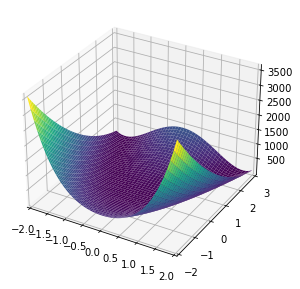

optimal point =  [0.44519069 0.12051672]
optimal value =  0.911200962994064
||gradient|| =  20.08057871239873
# iterations =  10000


      fun: 2.5352978256684153e-15
 hess_inv: array([[0.50186009, 1.00315326],
       [1.00315326, 2.01027466]])
      jac: array([-1.70451176e-06,  8.23257352e-07])
  message: 'Optimization terminated successfully.'
     nfev: 39
      nit: 32
     njev: 39
   status: 0
  success: True
        x: array([0.99999997, 0.99999995])

In [12]:
# Rosenbrock's Function
x, y = sp.symbols('x[0] x[1]')
ros = sp.Function('f', real=True)
ros = 100*(y - x**2)**2 + (1 - x)**2

#print(ros)
#print(ros.diff(x))
#print(ros.diff(y))

sp.plotting.plot3d(ros, (x, -2, 2), (y, -2, 3))

def r(x):
    return (1 - x[0])**2 + 100*(-x[0]**2 + x[1])**2

def grad_r(x):
    return np.array([-400*x[0]*(-x[0]**2 + x[1]) + 2*x[0] - 2,
                     -200*x[0]**2 + 200*x[1]])


x0 = np.array([-1.2, 1.0])
gradient_descent(r, grad_r, x0, alpha = 0.006, max_iter=10000)

out = opt.minimize(r, x0, jac=grad_r, method='BFGS')
out

In [13]:
A = np.array([[1, -2, 3], [3, 2, -5], [2, -5, 2]])
b = np.array([-1, 3, 0])

def g(x):
    return np.linalg.norm(np.dot(A, x) - b)

x0 = np.array([1, 1, 1])
g(x0)

4.358898943540674

### Example: solving systems of equations using optimization
* A system of equations given by $A\mathbf{x} = b$ where $A$ is a matrix, $b$ is a vector, and $\mathbf{x}$ is the solution can be solved using optimization tools
* The approach takes advandage of the fact that any norm is either positive or zero, and that the norm of the zero-vector $\mathbf{O}$ is always zero. It works like this: start with the system
\begin{equation}
A\mathbf{x} = b
\end{equation}
Rewrite:
\begin{equation}
A\mathbf{x} - b = \mathbf{O}
\end{equation}
Calculate Euclidean norm on both sides of the equation:
\begin{equation}
\left\| A\mathbf{x} - b \right\| = \|\mathbf{O}\|
\end{equation}
Since $\|\mathbf{O}\| = 0$, then:
\begin{equation}
\left\| A\mathbf{x} - b \right\| = 0
\end{equation}
To make life easier, we want to remove the square root from the Euclidean norm on the left-hand side, so we square both sides:
\begin{equation}
\left\| A\mathbf{x} - b \right\|^2 = 0
\end{equation}
Bottom line: if $\mathbf{x}$ is solution to the system $A\mathbf{x} = b$, then $\mathbf{x}$ is minimum of the function $f(\mathbf{x}) = \left\| A\mathbf{x} - b \right\|^2$. Thus, to solve a system of equations, the only thing we need to do is define the function $f$ and minimize it.

* Solve the system:
\begin{equation}
\left\{
\begin{array}{rcl}
x + y + z &=& 6\\
2x - y + z &=& 3\\
3x + y - z &=& 2
\end{array}
\right.
\end{equation}

In [14]:
# Define varibales and matrices
A = sp.Matrix([[1, 1, 1], [2, -1, 1], [3, 1, -1]])
b = sp.Matrix([6, 3, 2])
x, y, z, X = sp.symbols('x[0] x[1] x[2] X', real=True)
X = sp.Matrix([x, y, z])

# Define the function f
f = sp.Function('f', real=True)
f = ((A*X - b).norm())**2

# Define the numpy function f
#print(f)
#print(f.diff(x))
#print(f.diff(y))
#print(f.diff(z))

def f(x):
    return (x[0] + x[1] + x[2] - 6)**2 + (2*x[0] - x[1] + x[2] - 3)**2 + (3*x[0] + x[1] - x[2] - 2)**2

def grad(x):
    return np.array([28*x[0] + 4*x[1] - 36,
                     4*x[0] + 6*x[1] - 2*x[2] - 10,
                     -2*x[1] + 6*x[2] - 14])

x0 = np.array([6, -1, 1])
gradient_descent(f, grad, x0, max_iter=1000)

opt.minimize(f, x0, method='BFGS')

optimal point =  [1.00000003 1.9999998  2.99999983]
optimal value =  1.3145685663806098e-13
||gradient|| =  9.789028750125397e-07
# iterations =  446


      fun: 1.0369228226557e-15
 hess_inv: array([[ 0.04, -0.03, -0.01],
       [-0.03,  0.21,  0.07],
       [-0.01,  0.07,  0.19]])
      jac: array([ 3.55271368e-13, -4.68958199e-13,  2.73558953e-12])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([0.99999999, 1.99999999, 2.99999999])